In [1]:
import pandas as pd

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
customers.head(),products.head(),transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [5]:
customers_info = {
    "Missing Values": customers.isnull().sum(),
    "Duplicates": customers.duplicated().sum()
}
products_info = {
    "Missing Values": products.isnull().sum(),
    "Duplicates": products.duplicated().sum()
}
transactions_info = {
    "Missing Values": transactions.isnull().sum(),
    "Duplicates": transactions.duplicated().sum()
}

In [6]:
customers_info, products_info, transactions_info

({'Missing Values': CustomerID      0
  CustomerName    0
  Region          0
  SignupDate      0
  dtype: int64,
  'Duplicates': 0},
 {'Missing Values': ProductID      0
  ProductName    0
  Category       0
  Price          0
  dtype: int64,
  'Duplicates': 0},
 {'Missing Values': TransactionID      0
  CustomerID         0
  ProductID          0
  TransactionDate    0
  Quantity           0
  TotalValue         0
  Price              0
  dtype: int64,
  'Duplicates': 0})

In [8]:
transactions_merged = transactions.merge(products, on="ProductID", how="left")
final_data = transactions_merged.merge(customers, on="CustomerID", how="left")
final_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [9]:
final_data["TransactionDate"] = pd.to_datetime(final_data["TransactionDate"])
final_data["SignupDate"] = pd.to_datetime(final_data["SignupDate"])

In [13]:
customer_aggregated = final_data.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean", "count"], 
    "TransactionID": "count",               
    "ProductID": "nunique",                 
    "Quantity": "sum",                      
}).reset_index()

In [14]:
customer_aggregated

CustomerID TotalValue                    TransactionID ProductID Quantity
                      sum         mean count         count   nunique      sum
0        C0001    3354.52   670.904000     5             5         5       12
1        C0002    1862.74   465.685000     4             4         4       10
2        C0003    2725.38   681.345000     4             4         4       14
3        C0004    5354.88   669.360000     8             8         8       23
4        C0005    2034.24   678.080000     3             3         3        7
..         ...        ...          ...   ...           ...       ...      ...
194      C0196    4982.88  1245.720000     4             4         3       12
195      C0197    1928.65   642.883333     3             3         3        9
196      C0198     931.83   465.915000     2             2         2        3
197      C0199    1979.28   494.820000     4             4         4        9
198      C0200    4758.60   951.720000     5             5         5       16

[199 rows x 7 columns]

In [15]:
customer_aggregated.columns = ["CustomerID", "TotalSpend", "AvgTransactionValue", "TransactionCount", 
                               "TransactionFrequency", "UniqueProductsBought", "TotalQuantity"]

In [16]:
customer_aggregated

,CustomerID,TotalSpend,AvgTransactionValue,TransactionCount,TransactionFrequency,UniqueProductsBought,TotalQuantity
0,C0001,3354.52,670.904000,5,5,5,12
1,C0002,1862.74,465.685000,4,4,4,10
2,C0003,2725.38,681.345000,4,4,4,14
3,C0004,5354.88,669.360000,8,8,8,23
4,C0005,2034.24,678.080000,3,3,3,7
...,...,...,...,...,...,...,...
194,C0196,4982.88,1245.720000,4,4,3,12
195,C0197,1928.65,642.883333,3,3,3,9
196,C0198,931.83,465.915000,2,2,2,3
197,C0199,1979.28,494.820000,4,4,4,9


In [17]:
customer_profile = customer_aggregated.merge(customers, on="CustomerID", how="left")
customer_profile.head()

,CustomerID,TotalSpend,AvgTransactionValue,TransactionCount,TransactionFrequency,UniqueProductsBought,TotalQuantity,CustomerName,Region,SignupDate
0,C0001,3354.52,670.904,5,5,5,12,Lawrence Carroll,South America,2022-07-10
1,C0002,1862.74,465.685,4,4,4,10,Elizabeth Lutz,Asia,2022-02-13
2,C0003,2725.38,681.345,4,4,4,14,Michael Rivera,South America,2024-03-07
3,C0004,5354.88,669.360,8,8,8,23,Kathleen Rodriguez,South America,2022-10-09
4,C0005,2034.24,678.080,3,3,3,7,Laura Weber,Asia,2022-08-15


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt 

In [20]:
numerical_features = customer_profile[["TotalSpend", "AvgTransactionValue", "TransactionCount",
                                       "TransactionFrequency", "UniqueProductsBought", "TotalQuantity"]]

In [22]:
numerical_features.head()

,TotalSpend,AvgTransactionValue,TransactionCount,TransactionFrequency,UniqueProductsBought,TotalQuantity
0,3354.52,670.904,5,5,5,12
1,1862.74,465.685,4,4,4,10
2,2725.38,681.345,4,4,4,14
3,5354.88,669.360,8,8,8,23
4,2034.24,678.080,3,3,3,7


In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

In [24]:
db_indices = []
inertia_values = []
range_clusters = range(2,11)

In [25]:
for k in range_clusters:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)
    db_indices.append(davies_bouldin_score(scaled_features,kmeans.labels_))

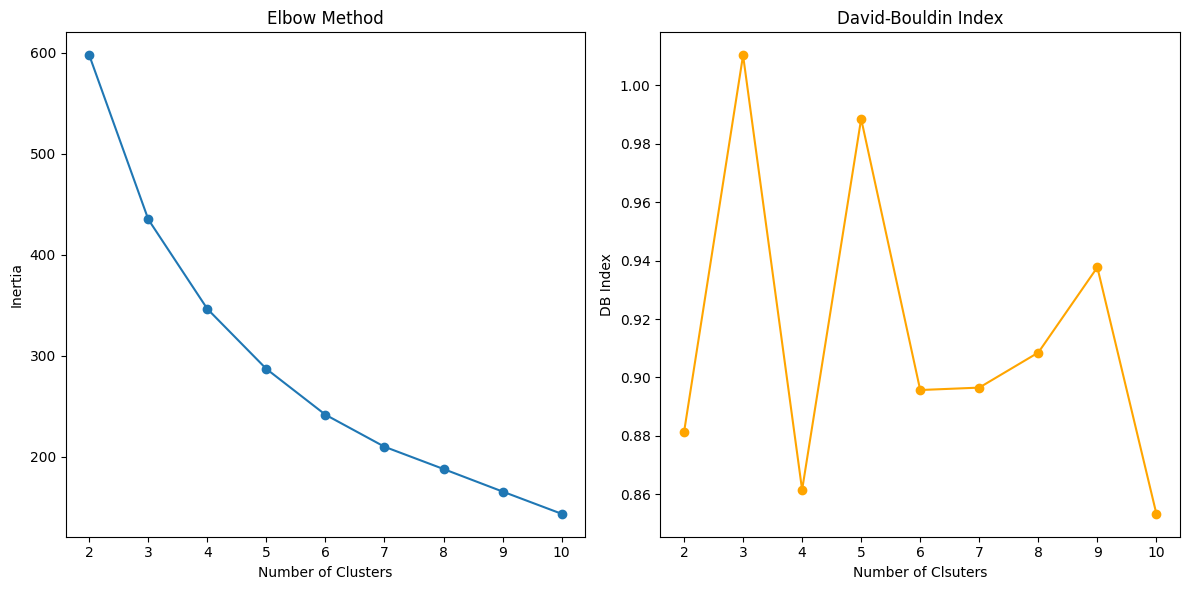

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range_clusters, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(range_clusters,db_indices, marker='o', color='orange')
plt.title('David-Bouldin Index')
plt.xlabel('Number of Clsuters')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

In [28]:
optimal_clusters = range_clusters[db_indices.index(min(db_indices))]
optimal_clusters

10

In [34]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_profile["Cluster"]= kmeans.fit_predict(scaled_features)
kmeans

KMeans(n_clusters=10, n_init=10, random_state=42)

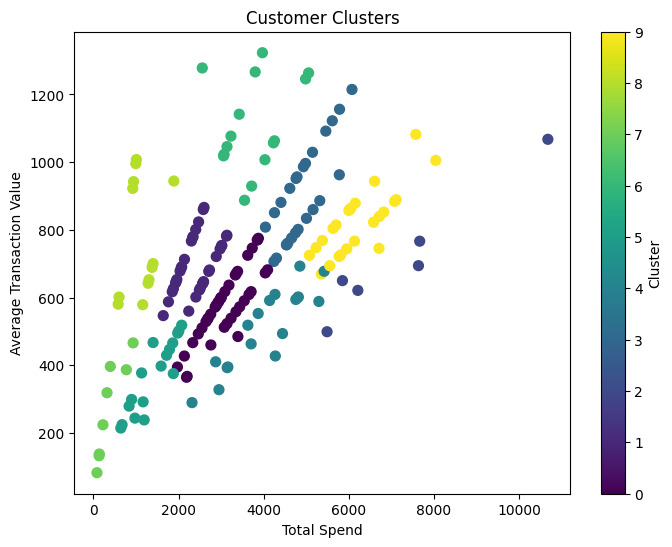

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(customer_profile["TotalSpend"], customer_profile["AvgTransactionValue"], 
            c=customer_profile["Cluster"], cmap='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('Total Spend')
plt.ylabel('Average Transaction Value')
plt.colorbar(label='Cluster')
plt.show()

In [36]:
final_db_index = davies_bouldin_score(scaled_features, customer_profile["Cluster"])
final_db_index

0.853273711532324